<a href="https://colab.research.google.com/github/rkdwogns/TIS/blob/main/%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [56]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0    # 흑백이지만, 깊이(채널) 차원 추가

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [57]:
model = keras.Sequential()

In [58]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                              padding='same', input_shape=(28,28,1)))

In [59]:
model.add(keras.layers.MaxPooling2D(2))

In [60]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', 
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [61]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 100)              

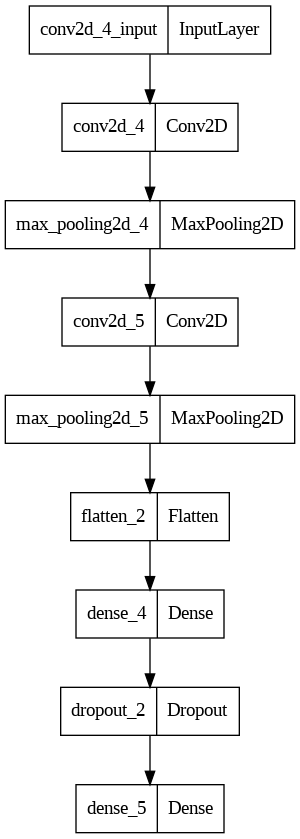

In [63]:
keras.utils.plot_model(model)

In [64]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 79s 51ms/step - loss: 0.5087 - accuracy: 0.8173 - val_loss: 0.3162 - val_accuracy: 0.8830
Epoch 2/20
1500/1500 [==============================] - 78s 52ms/step - loss: 0.3377 - accuracy: 0.8781 - val_loss: 0.2730 - val_accuracy: 0.8965
Epoch 3/20
1500/1500 [==============================] - 73s 49ms/step - loss: 0.2906 - accuracy: 0.8958 - val_loss: 0.2436 - val_accuracy: 0.9097
Epoch 4/20
1500/1500 [==============================] - 78s 52ms/step - loss: 0.2574 - accuracy: 0.9063 - val_loss: 0.2341 - val_accuracy: 0.9137
Epoch 5/20
1500/1500 [==============================] - 80s 53ms/step - loss: 0.2346 - accuracy: 0.9136 - val_loss: 0.2307 - val_accuracy: 0.9153
Epoch 6/20
1500/1500 [==============================] - 73s 48ms/step - loss: 0.2130 - accuracy: 0.9222 - val_loss: 0.2154 - val_accuracy: 0.9209
Epoch 7/20
1500/1500 [==============================] - 77s 51ms/step - loss: 0.1978 - accuracy: 0.9272 - val_loss: 0.2241 -

In [65]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 6s 17ms/step - loss: 0.2154 - accuracy: 0.9209


[0.21544331312179565, 0.9209166765213013]

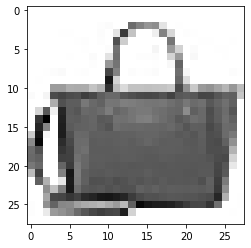

In [66]:
# 첫 번째 이미지 확인
import matplotlib.pyplot as plt
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r') # val_scaled[0].shape => (28, 28, 1)
plt.show()

In [67]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 123ms/step
[[1.06689004e-13 3.67346649e-23 1.60802852e-17 2.02338608e-16
  2.59285277e-15 7.20286054e-14 1.50633544e-14 2.97381646e-14
  1.00000000e+00 1.13369380e-14]]


In [68]:
import numpy as np
print(np.argmax(preds[0]))

8


In [69]:
arr = np.array([[1,2,3],[4,5,6]])
arr[0:1]

array([[1, 2, 3]])

In [70]:
val_scaled[0:1].shape

(1, 28, 28, 1)

In [71]:
# 패션 MNIST 데이터셋의 레이블을 리스트로 저장

classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [72]:
import numpy as np
print(classes[np.argmax(preds)]) # classes[8]

가방


In [73]:
# 스케링 및 리쉐어링
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [74]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 5s 15ms/step - loss: 0.2381 - accuracy: 0.9138


[0.2380589097738266, 0.9138000011444092]

In [75]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


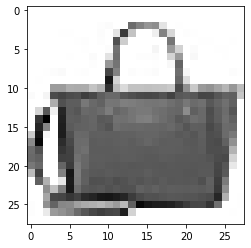

In [76]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r') # val_scaled[0].shape => (28, 28, 1)
plt.show()

In [77]:
plt.savefig('handbag.png')

<Figure size 432x288 with 0 Axes>

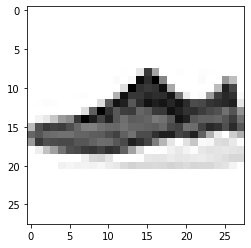

In [78]:
plt.imshow(val_scaled[2].reshape(28, 28), cmap='gray_r') # val_scaled[0].shape => (28, 28, 1)
plt.show()

In [79]:
plt.savefig('sneakers.png')

<Figure size 432x288 with 0 Axes>

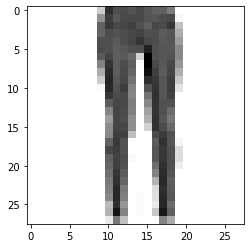

In [80]:
plt.imshow(val_scaled[6].reshape(28, 28), cmap='gray_r') # val_scaled[0].shape => (28, 28, 1)
plt.show()

In [81]:
plt.savefig('trousers.png')

<Figure size 432x288 with 0 Axes>

In [89]:
# 참고: https://gradio.app/image-classification-in-tensorflow/

import gradio as gr
import numpy as np

classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

def classify_image(input_img):
  reshaped_image = input_img.reshape(-1, 28, 28, 1)/ 255.0
  prediction = model.predict(reshaped_image).flatten()
  sorted_indices = np.argort(prediction)[::-1]
  probabilities = {classes[i]: float(prediction[i]) for i in sorted_indices}
  return probabilities

demo = gr.Interface(fn=classify_image,
             inputs=gr.Image(shape=(28, 28)),
             outputs=gr.Label(num_top_classes=3),
             examples=["handbag.png", "sneakers.png", "trousers.png"]
             )
demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>